In [22]:
import numpy as np
import pandas as pd

In [23]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

In [24]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


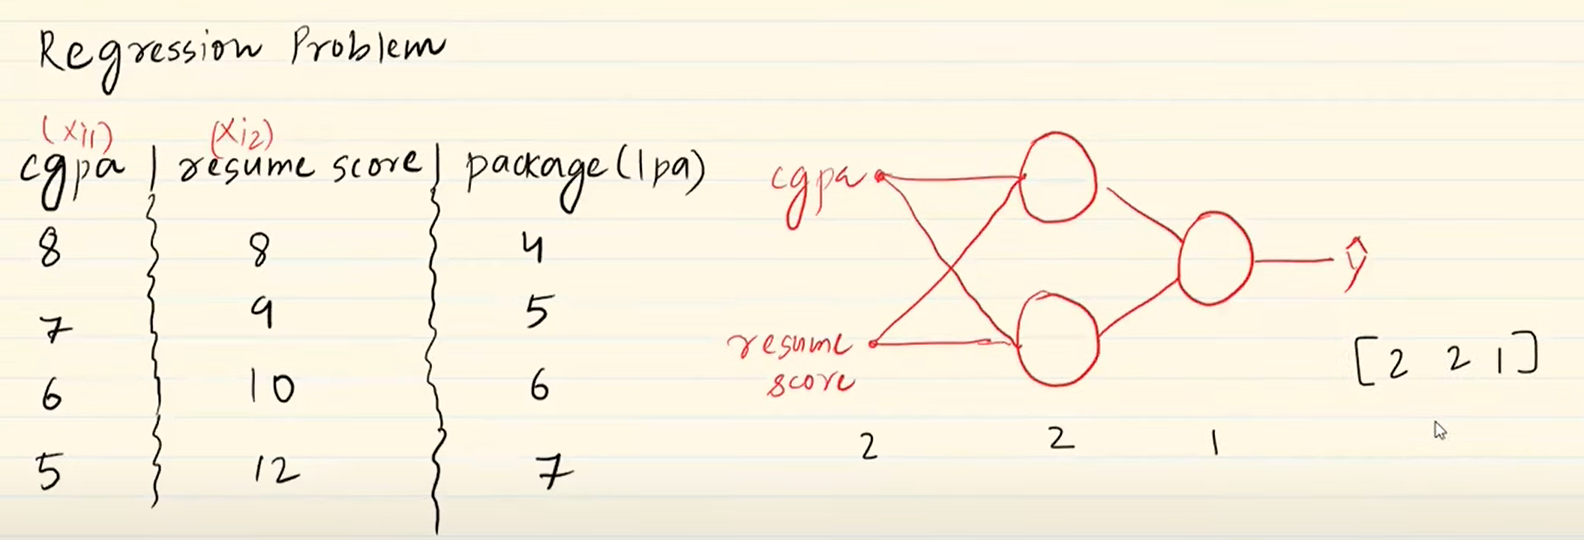

In [25]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [26]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [27]:
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b

  return Z

In [28]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    print("A"+str(l-1)+": ", A_prev)
    print("W"+str(l)+": ", Wl)
    print("b"+str(l)+": ", bl)
    print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    print("A"+str(l)+": ", A)
    print("**"*20)

  return A,A_prev

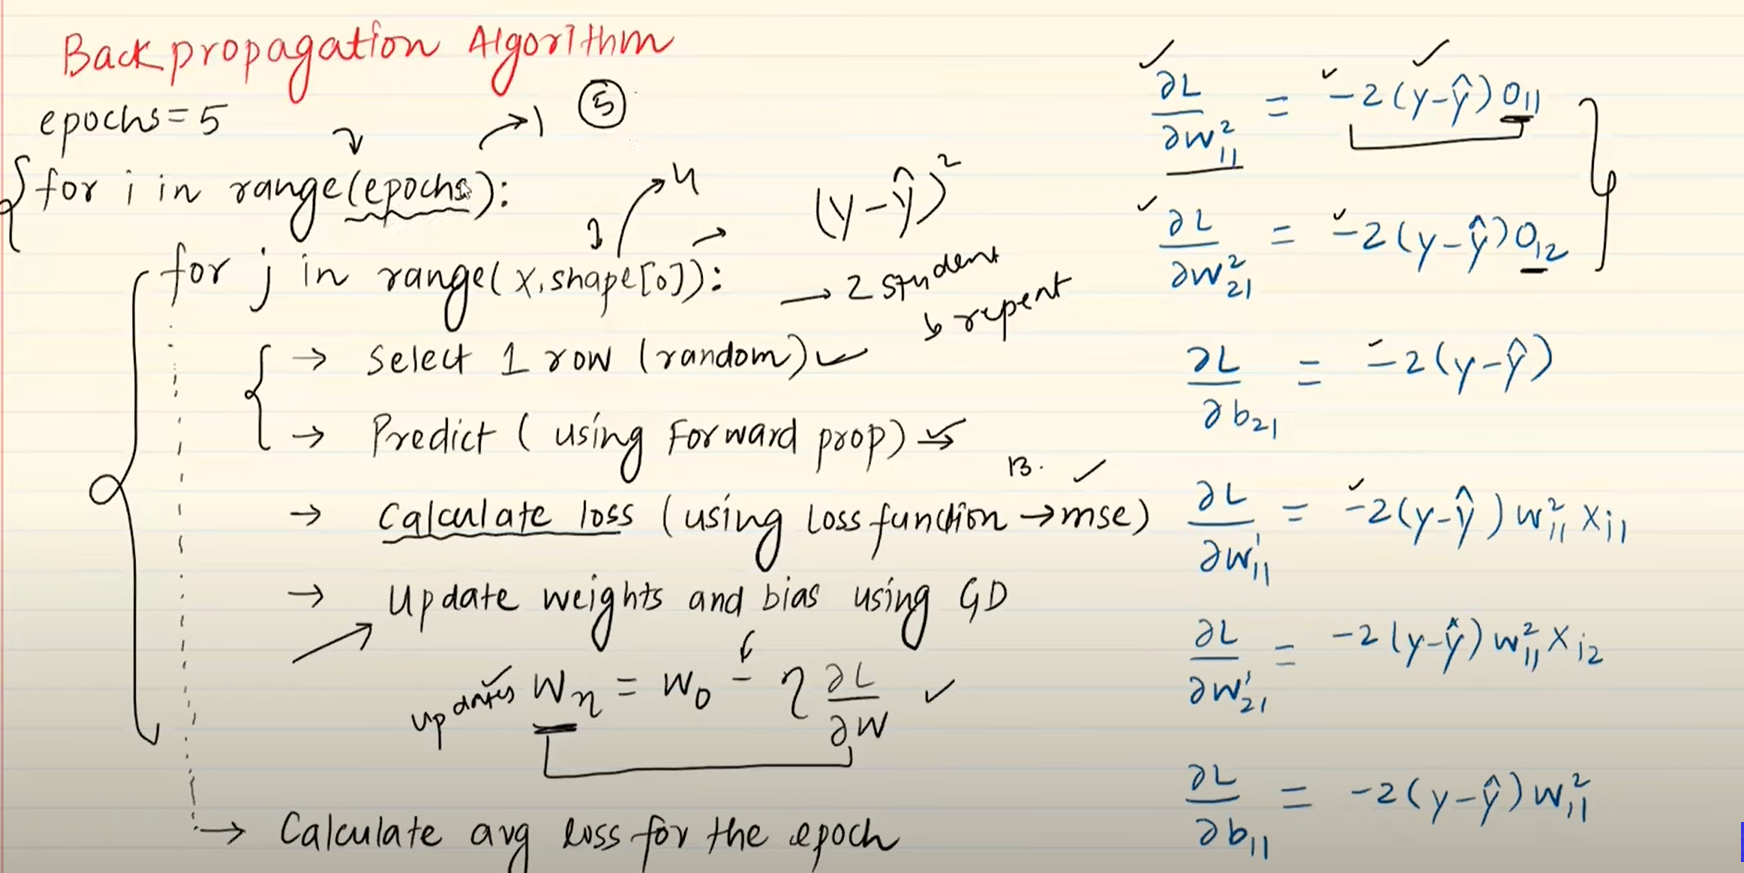

In [41]:
# we do five epochs for 4 students

In [39]:
# for 1st students
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.32]]
****************************************


In [30]:
(y-0.32)**2   # loss for 1st row

13.5424

In [32]:
y_hat = y_hat[0][0]

In [33]:
A1    #prev layer output

array([[1.6],
       [1.6]])

In [34]:
update_parameters(parameters,y,y_hat,A1,X)

In [35]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [36]:
# for second studnets
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[ 5]
 [12]]
W1:  [[0.10658137 0.10658137]
 [0.10658137 0.10658137]]
b1:  [[0.00082267]
 [0.00082267]]
----------------------------------------
A1:  [[1.81270598]
 [1.81270598]]
****************************************
A1:  [[1.81270598]
 [1.81270598]]
W2:  [[0.111776]
 [0.111776]]
b2:  [[0.119136]]
----------------------------------------
A2:  [[0.52437005]]
****************************************


In [37]:
update_parameters(parameters,y,y_hat,A1,X)

<ipython-input-31-f16975403a33>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
<ipython-input-31-f16975403a33>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
<ipython-input-31-f16975403a33>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001

In [38]:
parameters

{'W1': array([[0.11533984, 0.1276017 ],
        [0.11533984, 0.1276017 ]]),
 'b1': array([[0.00257437],
        [0.00257437]]),
 'W2': array([[0.13525283],
        [0.13525283]]),
 'b2': array([[0.14820409]])}

In [31]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [18]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.32]]
****************************************


{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [19]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

A0:  [[7]
 [9]]
W1:  [[0.10658137 0.10658137]
 [0.10658137 0.10658137]]
b1:  [[0.00082267]
 [0.00082267]]
----------------------------------------
A1:  [[1.70612461]
 [1.70612461]]
****************************************
A1:  [[1.70612461]
 [1.70612461]]
W2:  [[0.111776]
 [0.111776]]
b2:  [[0.119136]]
----------------------------------------
A2:  [[0.50054357]]
****************************************


{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]),
 'b1': array([[0.0019667],
        [0.0019667]]),
 'W2': array([[0.12712927],
        [0.12712927]]),
 'b2': array([[0.13612818]])}

In [43]:
# for 3rd stundets
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

A0:  [[ 6]
 [10]]
W1:  [[0.10816809 0.11960342]
 [0.10816809 0.11960342]]
b1:  [[0.00163362]
 [0.00163362]]
----------------------------------------
A1:  [[1.73232306]
 [1.91528829]]
****************************************
A1:  [[1.73232306]
 [1.91528829]]
W2:  [[0.122644]
 [0.122644]]
b2:  [[0.135964]]
----------------------------------------
A2:  [[0.58332165]]
****************************************


{'W1': array([[0.11735982, 0.13492296],
        [0.11748866, 0.13513769]]),
 'b1': array([[0.00316557],
        [0.00318705]]),
 'W2': array([[0.14141087],
        [0.143393  ]]),
 'b2': array([[0.15422636]])}

In [44]:
# for 4th students
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

A0:  [[ 5]
 [12]]
W1:  [[0.11735982 0.13492296]
 [0.11748866 0.13513769]]
b1:  [[0.00316557]
 [0.00318705]]
----------------------------------------
A1:  [[1.99982852]
 [2.29945416]]
****************************************
A1:  [[1.99982852]
 [2.29945416]]
W2:  [[0.14141087]
 [0.143393  ]]
b2:  [[0.15422636]]
----------------------------------------
A2:  [[0.76674949]]
****************************************


{'W1': array([[0.12772831, 0.15980735],
        [0.12821353, 0.1608774 ]]),
 'b1': array([[0.00523927],
        [0.00533202]]),
 'W2': array([[0.16634174],
        [0.17205915]]),
 'b2': array([[0.18452565]])}

In [45]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.32]]
****************************************
A0:  [[7]
 [9]]
W1:  [[0.10658137 0.10658137]
 [0.10658137 0.10658137]]
b1:  [[0.00082267]
 [0.00082267]]
----------------------------------------
A1:  [[1.70612461]
 [1.70612461]]
****************************************
A1:  [[1.70612461]
 [1.70612461]]
W2:  [[0.111776]
 [0.111776]]
b2:  [[0.119136]]
----------------------------------------
A2:  [[0.50054357]]
****************************************
A0:  [[ 6]
 [10]]
W1:  [[0.11458955 0.1168776 ]
 [0.11458955 0.1168776 ]]
b1:  [[0.0019667]
 [0.0019667]]
----------------------------------------
A1:  [[1.83539945]
 [1.87200826]]
****************************************
A1:  [[1.83539945]
 [1.87200826]]
W2:  [[0.12712927]
 [0.127

{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}